# クラスタリングアルゴリズムの比較と評価

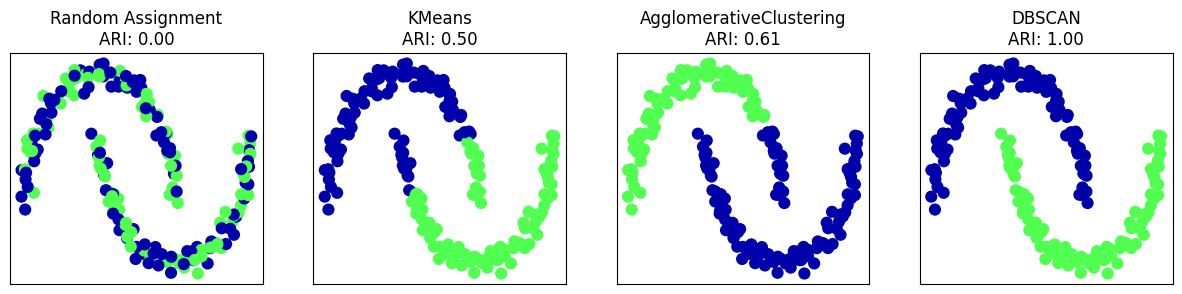

In [1]:
from sklearn.datasets import make_moons
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering 
import matplotlib.pyplot as plt
import numpy as np
import mglearn

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# データを標準偏差にスケールする
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.fit_transform(X)

fig, axes = plt.subplots(1,4, figsize=(15,3), subplot_kw={'xticks':(), 'yticks':()})

# 利用するアルゴリズムのリストを作る
algorithms = [
  KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()
] 

# 参照の為にランダムなクラスタ割り当てを作る
random_state = np.random.RandomState(0)
random_clusters = random_state.randint(0, 2, size=len(X))

# ランダムな割り当てをプロット
axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random Assignment\nARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))


for ax, algorithm in zip(axes[1:], algorithms):
  # クラスタリングアルゴリズムを適用する
  clusters = algorithm.fit_predict(X_scaled)
  # 結果をプロットする
  ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60)
  ax.set_title("{}\nARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))
plt.show()

###  シルエット係数による比較

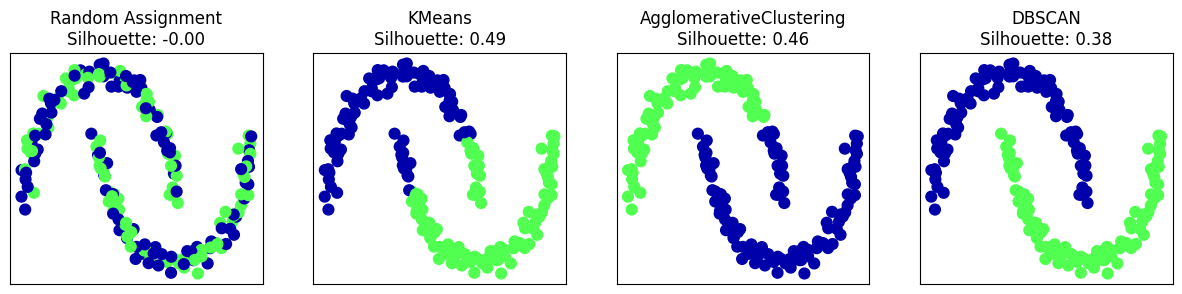

In [2]:
from sklearn.metrics import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.fit_transform(X)

fix, axes = plt.subplots(1,4, figsize=(15,3), subplot_kw={'xticks':(), 'yticks':()})

random_state = np.random.RandomState(0)
random_clusters = random_state.randint(0,2, size=len(X))
axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random Assignment\nSilhouette: {:.2f}".format(silhouette_score(X_scaled, random_clusters)))

algorithms = [
  KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()
]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{}\nSilhouette: {:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))
  